# Project: Investigating gapminder data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#loadinspect">Load and inspect data</a></li>
        <li><a href="#compare">Compare number of countries</a></li>
        <li><a href="#dropping">Drop unneeded rows and columns</a></li>
        <li><a href="#missing">Handle missing data</a></li>
        <ul>
            <li><a href="#missingco2">Fix missing values in CO2 data</a></li>
            <li><a href="#missinglife">Fix missing values in Life Expectancy data</a></li>
            <li><a href="#missingagr">Fix missing values in Agricultural Area data</a></li>
        </ul>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>Explain variables


### Questions

- How do CO2 emissions relate to the Agricultural Area of countries?
- How do CO2 emissions relate to the Human Development Index of a country?
- How do CO2 emissions relate to the population of a country?
- How do CO2 emissions relate to the average life expectancy of a country?

In [1437]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#run python file with helper functions for later use
%run helpers.py

#render plots in the notebook
%matplotlib inline
#set style for all plots
plt.style.use('ggplot');

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
<a id='loadinspect'></a>
### Load and inspect data

In this section, I will inspect the different datasets individually\
to familiarize myself with them and prepare them for the following analysis.

In [1438]:
#load population over time dataset
pop = pd.read_csv('./gapminder_data/population_total.csv')
display(pop.info())
display(pop.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


None

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [1439]:
#load dataset with CO2 emissions per country over time
co2 = pd.read_csv('./gapminder_data/co2_emissions_tonnes_per_person.csv')
display(co2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2018
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


None

In [1440]:
display(co2.head())

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [1441]:
#load data for agricultural area in %
agri_area = pd.read_csv('./gapminder_data/agricultural_land_percent_of_land_area.csv')
display(agri_area.describe())

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,179.000000,179.000000,179.000000,179.00000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,208.000000,208.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,209.000000,209.000000
mean,35.662011,35.691989,35.869721,35.96476,36.082838,36.156922,36.180464,36.238564,36.333844,36.243827,...,37.349837,37.362038,37.401452,37.408629,37.257967,37.167276,37.311195,37.303671,37.313641,37.307517
std,22.978034,22.956236,22.921644,22.87260,22.777688,22.717678,22.721408,22.723879,22.774553,22.609197,...,22.291805,22.258781,22.141500,22.022010,22.013742,21.960084,21.885608,21.914717,21.960371,21.959391
min,0.263000,0.269000,0.263000,0.29500,0.301000,0.282000,0.276000,0.276000,0.301000,0.308000,...,0.515000,0.502000,0.513000,0.469000,0.533000,0.565000,0.558000,0.558000,0.538000,0.538000
25%,16.400000,16.400000,16.400000,16.45000,16.700000,16.700000,16.700000,16.750000,16.800000,16.800000,...,18.650000,18.775000,18.900000,19.225000,19.075000,19.075000,19.525000,19.625000,19.600000,19.600000
50%,33.100000,34.300000,35.500000,36.10000,36.500000,36.500000,36.600000,36.800000,36.800000,36.900000,...,38.400000,38.400000,37.850000,38.250000,37.700000,37.700000,38.450000,38.450000,38.300000,38.300000
75%,54.100000,53.400000,53.700000,53.85000,54.150000,53.950000,54.100000,54.700000,54.550000,54.400000,...,54.075000,54.575000,54.150000,54.050000,53.775000,52.950000,53.175000,53.500000,54.000000,54.100000
max,93.400000,92.800000,92.200000,91.90000,91.300000,90.900000,90.600000,90.600000,90.500000,90.600000,...,84.600000,82.500000,83.000000,81.300000,81.900000,81.700000,81.700000,80.800000,80.800000,80.800000


In [1442]:
display(agri_area.head())

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,...,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1,11.1
1,Afghanistan,57.7,57.8,57.9,58.0,58.0,58.1,58.2,58.2,58.2,...,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1
2,Angola,45.9,45.9,45.9,45.9,45.9,46.0,46.0,46.0,46.0,...,41.7,42.1,42.6,43.0,43.5,43.9,44.3,44.8,45.2,45.7
3,Albania,45.0,45.0,45.0,44.9,45.1,45.3,45.4,45.3,45.1,...,43.8,43.8,43.8,43.8,43.3,42.9,42.9,43.1,42.7,42.8
4,Andorra,55.3,55.3,55.3,55.3,55.3,55.3,55.3,55.3,55.3,...,44.2,42.1,42.1,39.9,40.0,40.0,40.0,40.0,40.0,40.1


In [1443]:
#load data for life ecpectancy
life_exp = pd.read_csv('./gapminder_data/life_expectancy_years.csv')
display(life_exp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


None

In [1444]:
display(life_exp.head())

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


<a id='compare'></a>
### Compare number of countries
The number of countries is different in each dataset.</br>
So this section is about finding out which and how many</br>
countries do not appear in all of the datasets.

In [1445]:
#save datasets and names for iterations
datasets = [pop, co2, life_exp, agri_area]
names = ['Population', 'CO2', 'Life Expectancy', 'Agricultural Area']
  
#compare countries
get_num_countries(datasets, names)

Number of countries in Population: 197
Number of countries in CO2: 194
Number of countries in Life Expectancy: 195
Number of countries in Agricultural Area: 211


In [1446]:
#save country columns as sets and
#look at the difference
sets = [set(ds.country) for ds in datasets]
combined_diff = []

import itertools

#compare each set with all others
for x, y in itertools.combinations(sets, 2):
    combined_diff += x.difference(y)
    combined_diff += y.difference(x)
    
combined_diff = sorted(set(combined_diff))
print(combined_diff)
print(len(combined_diff))

['American Samoa', 'Aruba', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Faeroe Islands', 'French Polynesia', 'Greenland', 'Guam', 'Holy See', 'Isle of Man', 'Kosovo', 'Liechtenstein', 'Monaco', 'New Caledonia', 'Northern Mariana Islands', 'Puerto Rico', 'San Marino', 'Taiwan', 'Turks and Caicos Islands', 'Virgin Islands (U.S.)']
22


<a id='dropping'></a>
### Drop unneeded rows and columns

There are 22 countries that do not appear in all datasets.<br/>
Since all of them are very small and sparsely populated,<br/>
I drop these rows from the datasets.

In [1447]:
for ds in datasets:
    #get indexes of rows to drop
    to_drop = ds[ds['country'].isin(combined_diff)].index
    #drop rows accordingly
    ds.drop(to_drop, axis=0, inplace=True)

#check if number of countries matches now
get_num_countries(datasets, names)          

Number of countries in Population: 192
Number of countries in CO2: 192
Number of countries in Life Expectancy: 192
Number of countries in Agricultural Area: 192


Now that I have the same countries in all the datasets, I also<br/>
want to look at the same timeframes in all of them, if possible.</br>
I will look only at data after 1949, so I drop the columns I don't need.

In [1448]:
#drop data from 1800 to 1949 from all datasets,
#except Agricultural Area, which only starts in 1961
[val.drop(val.loc[:, '1800':'1949'], axis=1, inplace=True) for i, val in enumerate(datasets) if names[i] != 'Agricultural Area'];

<a id='missing'></a>
### Handle missing data

An overview shows that there are no missing values in the population dataset,</br>
but there are several in the CO2, Forest Area and Life expectancy datasets.</br>
They will be fixed in the next sections.

In [1449]:
#check for NaN values
for i, val in enumerate(datasets):
    filtered = get_missing(val)[0]
    #output num of missing values
    display('Number of missing values per country in {}: {}'.format(names[i], [x for x in filtered.values]))
    display('Number of countries with missing values in {}: {}'.format(names[i], len([x for x in filtered.values])))

'Number of missing values per country in Population: []'

'Number of countries with missing values in Population: 0'

'Number of missing values per country in CO2: [40, 9, 7, 9, 8, 8, 9, 20, 22, 9, 8, 9, 9, 1, 44, 9, 42, 9, 8, 9, 5, 11, 31, 5, 40, 9, 21, 42, 9, 9, 9, 9, 9, 9, 41, 8, 14, 14, 42, 40, 9, 8, 7, 2, 9, 9, 1, 9, 2, 13, 9, 52, 40, 5, 12, 9, 9]'

'Number of countries with missing values in CO2: 57'

'Number of missing values per country in Life Expectancy: [81, 81, 81, 81, 81, 81, 81]'

'Number of countries with missing values in Life Expectancy: 7'

'Number of missing values per country in Agricultural Area: [31, 31, 31, 31, 32, 32, 31, 30, 31, 31, 31, 31, 31, 39, 31, 31, 30, 31, 45, 30, 2, 31, 50, 45, 50, 32, 31, 31, 31, 31, 31]'

'Number of countries with missing values in Agricultural Area: 31'

<a id='missingco2'></a>
#### Fix missing values in CO2 data
A bar chart of the missing values in CO2 shows that there are quite a lot,</br>
so I don't want to drop the affected rows or replace the values with 0. 
</br>Instead I use the pandas `fillna()` function to impute the missing </br>
values with the mean (rounded to 4 decimal places to match the existing values).

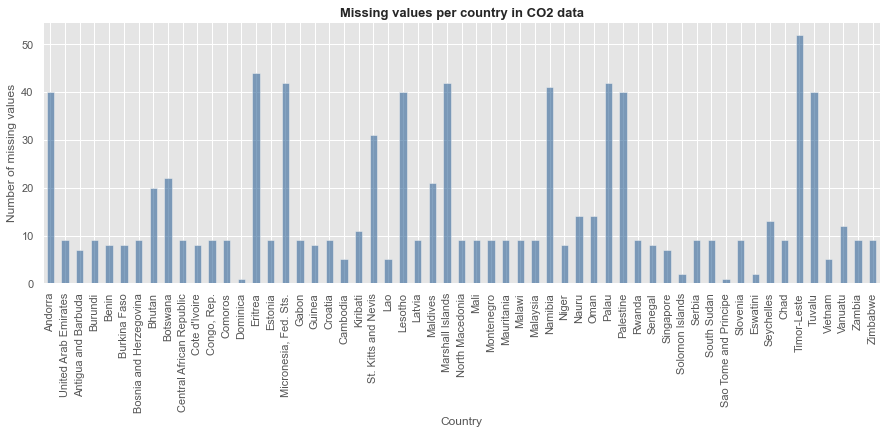

In [1450]:
#set chart size
plt.figure(figsize=(15, 4.8))

#create bar chart
x_val, x_lab = get_missing(co2)
plot_missing(co2, x_val, x_lab, 'CO2')

In [1451]:
#replace missing with mean
#parameter numeric_only=True to get rid of a Future Warnings
co2.fillna(round(co2.mean(numeric_only=True), 4), inplace=True)

In [1452]:
#verify that there are no more missing values
co2.isna().sum().any()

False

<a id='missinglife'></a>
#### Fix missing values in Life Expectancy data
The bar chart shows that 7 countries have 81 missing values each.

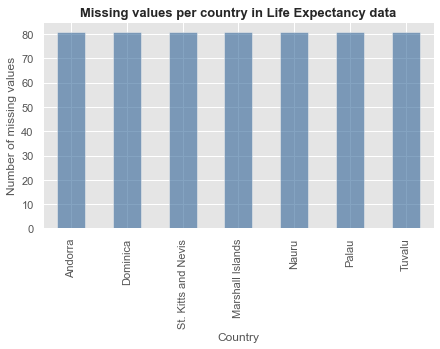

In [1453]:
#set chart size
plt.figure(figsize=(7, 3.8))

#create bar chart
x_val, x_lab = get_missing(life_exp)
plot_missing(co2, x_val, x_lab, 'Life Expectancy')


In this case looking at the DataFrame makes it clearer than a chart that</br>
apparently those 7 countries are missing all the predicted future values</br>
(the future at the time the dataset was created).</br>
I use pandas `fillna()` function to replace the NaN values with zeros.

In [1454]:
life_exp[life_exp['missing'].isin(x_val)].loc[:,'2018':]

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,missing
3,82.1,82.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
46,72.3,72.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
93,72.1,72.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
112,65.3,65.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
131,63.2,63.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
138,67.4,67.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
178,67.8,67.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81


In [1455]:
#replace missing values with 0
life_exp.fillna(0, inplace=True)

#verify that there are no more missing values 
co2.isna().sum().any()

False

<a id='missingagr'></a>
#### Fix missing values in Agricultural Area data
After plotting a chart and inspecting the missing values in the DataFrame,</br> 
it is apparent that the missing values appear only before 1992.</br>
Again the missing values are imputed with `fillna()` function using the</br>
'backfill'-method, which uses the next non-null value to fill the gaps.

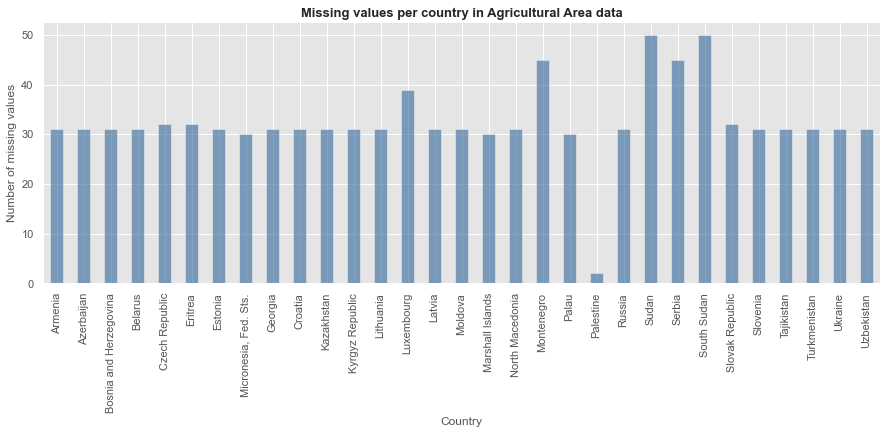

In [1456]:
#set chart size
plt.figure(figsize=(15, 4.8))

#create bar chart
x_val, x_lab = get_missing(agri_area)
plot_missing(co2, x_val, x_lab, 'Agricultural Area')

In [1457]:
agri_area[agri_area['missing'].isin(x_val)].loc[:,:'1995'].head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.1,41.5,42.1,43.7
12,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.4,53.6,53.9,53.9
21,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,42.8,42.6,42.5
22,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.3,46.1,46.1,46.0
48,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.4,55.4,55.4


In [1458]:
#replace missing with next values
agri_area.fillna(method='backfill', axis=0, inplace=True)

In [1459]:
#verify that there are no more missing values
co2.isna().sum().any()

False

#### Finally
The 'missing' column won't be needed anymore, so I drop it.

In [1460]:
[val.drop(columns=['missing'], inplace=True) for val in datasets]

Index(['country', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=152)


### Data Cleaning (Replace this with more specific notes!)

In [1461]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#duplicates
#datatypes
#uniformity (units)


### Check  datatypes and duplicates

All 152 columns in the Population data are of object type,</br>
which is not what I want because I need numerical data for</br>
plotting and exploring. This will be handled in the next section.</br>
The columns with numerical data in CO2, Agricultural Area and </br>
Life Expectancy are all floats, so nothing has to be fixed here. </br>
None of the datasets contain any duplicated rows.

In [1481]:
print(pop.info())
print(pop.duplicated().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 196
Columns: 152 entries, country to 2100
dtypes: object(152)
memory usage: 229.5+ KB
None
False


In [1482]:
print(co2.info(verbose = False))
print(co2.duplicated().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 193
Columns: 70 entries, country to 2018
dtypes: float64(69), object(1)
memory usage: 106.5+ KB
None
False


In [1483]:
print(agri_area.info(verbose = False))
print(agri_area.duplicated().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 210
Columns: 59 entries, country to 2018
dtypes: float64(58), object(1)
memory usage: 90.0+ KB
None
False


In [1484]:
print(life_exp.info())
print(life_exp.duplicated().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 194
Columns: 152 entries, country to 2100
dtypes: float64(151), object(1)
memory usage: 229.5+ KB
None
False


#### Fix datatypes in Population data

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [1463]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [1464]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!